# Pandas 시각화

DataFrame은 내부적으로 `pyplot` 객체를 초기화고 있기 때문에 이를 활용하여 그래프를 직접 표시할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## #02. Line Plot

### [1] 데이터 가져오기

2023년 12월 01일부터 2023년 12월 31일까지 벤츠, BMW, 아우디에 대한 구간별 검색량의 상대적 비율.

(구간별 결과에서 가장 큰 값을 100으로 설정한 상댓값)

> 출처: 네이버 OpenAPI 연동 결과 저장
>
> 데이터 유형에 따라 그래프의 종류가 결정되므로 단원별로 데이터를 개별적으로 가져오기로 한다.

In [7]:
df1 = read_excel("https://data.hossam.kr/pydata/naver_search_trend.xlsx", index_col='DATE')
df1

,BENZ,BMW,AUDI
DATE,,,
2023-12-01,48.60475,67.90340,23.16152
2023-12-02,51.86098,68.63919,23.87382
2023-12-03,51.72008,68.72529,23.95209
2023-12-04,51.87663,67.08935,23.61160
2023-12-05,55.30116,68.33392,23.21239
2023-12-06,54.50275,70.95221,23.70553
2023-12-07,55.56338,68.44350,24.57046
2023-12-08,58.31865,69.22625,25.99115
2023-12-09,60.40859,71.66451,24.39826


### [2] 특정 컬럼에 대한 시각화

DataFrame은 내부적으로 `pyplot` 객체를 초기화고 있기 때문에 그래프 초기화 메서드인 `plt.figure()`를 호출할 필요가 없다. 

그러므로 그래프의 사이즈는 그래프 메서드에서 직접 지정해야 한다.

DataFrame의 index가 x축을 담당한다.

기본적으로 DataFrame의 컬럼 이름이 label이 되지만 `plot()` 메서드에 label 파라미터를 설정하여 다른 이름으로 변경할 수 있다.

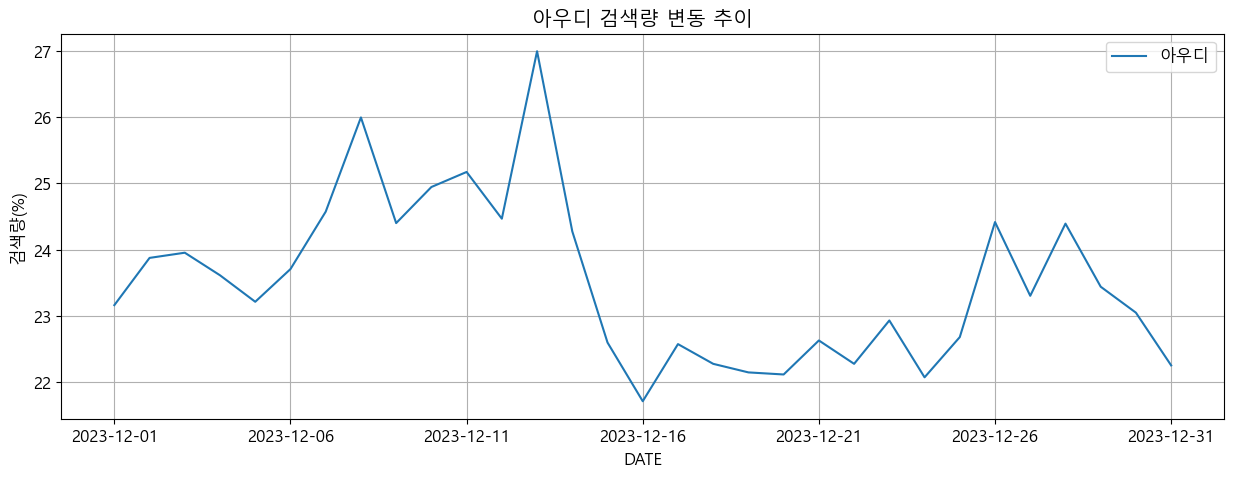

In [8]:
df1['AUDI'].plot(label='아우디', figsize=(15,5))
plt.grid()
plt.legend()
plt.title("아우디 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

### [2] 2개 이상 컬럼에 대한 시각화

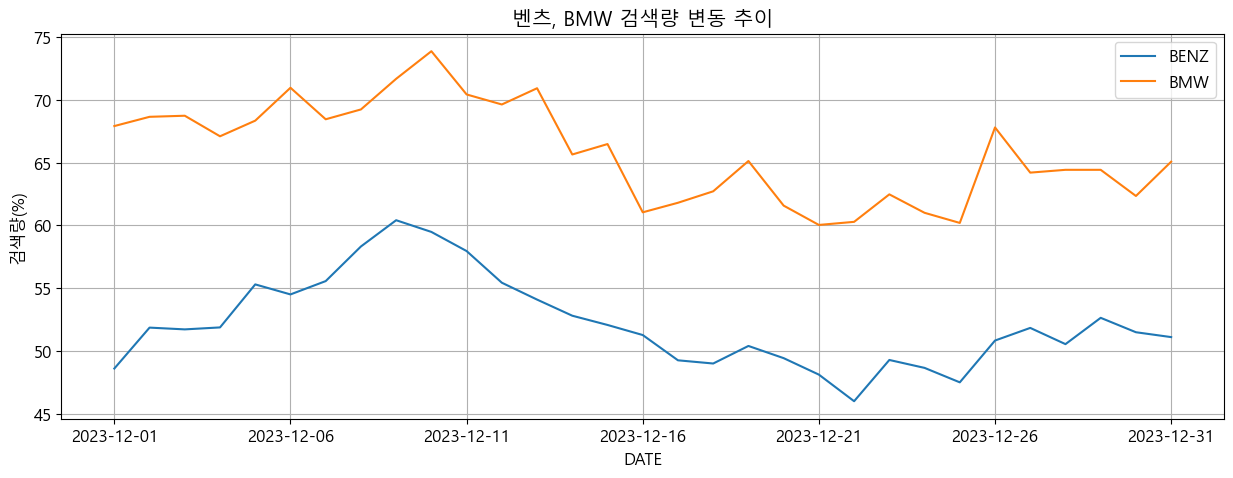

In [9]:
df1.filter(['BENZ', 'BMW']).plot(figsize=(15,5))
plt.grid()
plt.legend()
plt.title("벤츠, BMW 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

### 3. 전체 컬럼에 대한 시각화

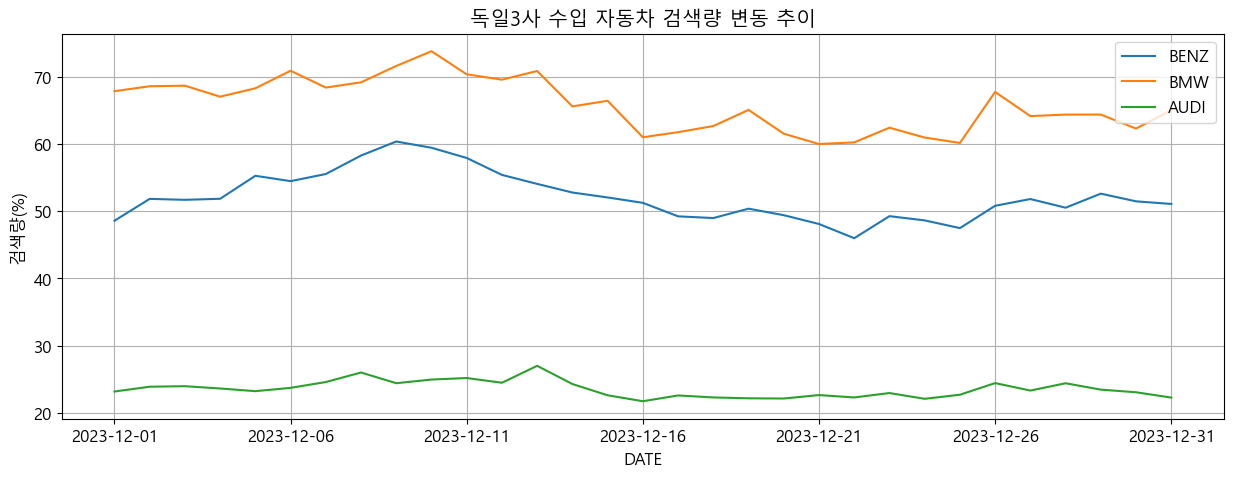

In [10]:
df1.plot(figsize=(15, 5))
plt.grid()
plt.legend()
plt.title("독일3사 수입 자동차 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

## #03. Bar Plot

### 1. 특정 컬럼에 대한 시각화

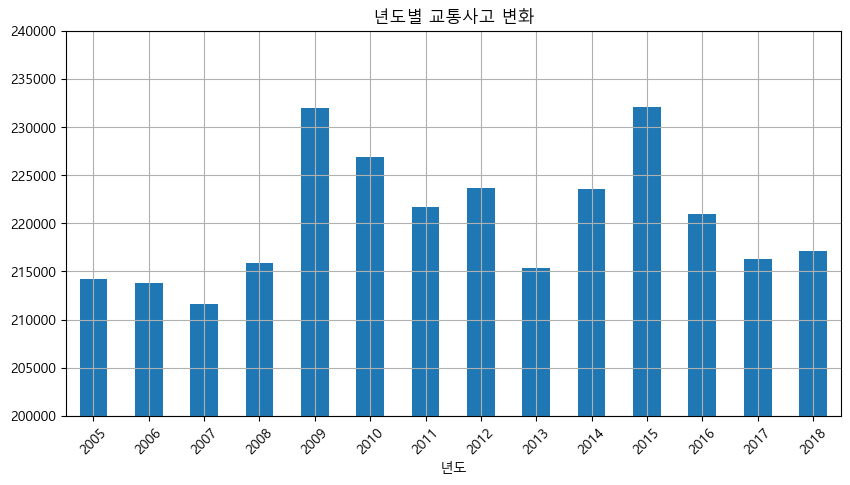

In [10]:
df['발생건수'].plot.bar(rot=45)
plt.grid()
plt.title("년도별 교통사고 변화")
plt.ylim(200000, 240000)
plt.show()
plt.close()

### 2. 2개 이상 컬럼에 대한 시각화

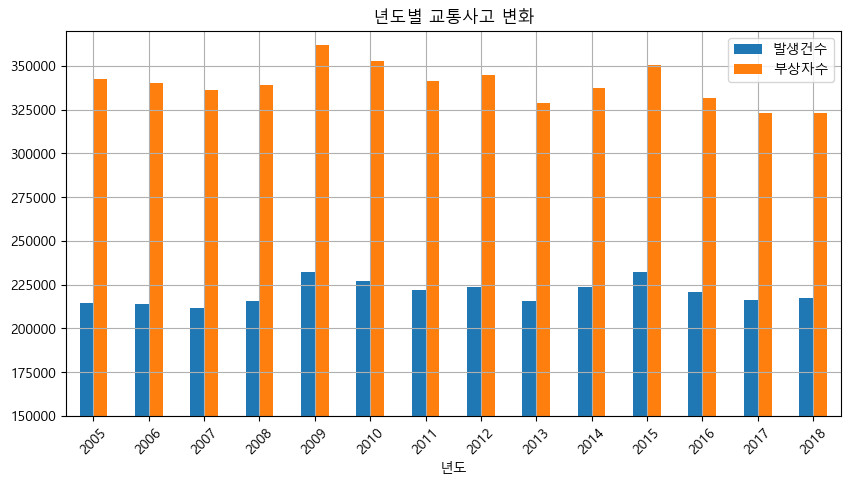

In [11]:
df.filter(['발생건수','부상자수']).plot.bar(rot=45)
plt.grid()
plt.legend()
plt.title("년도별 교통사고 변화")
plt.ylim(150000, 370000)
plt.show()
plt.close()

### 3. 전체 컬럼에 대한 시각화

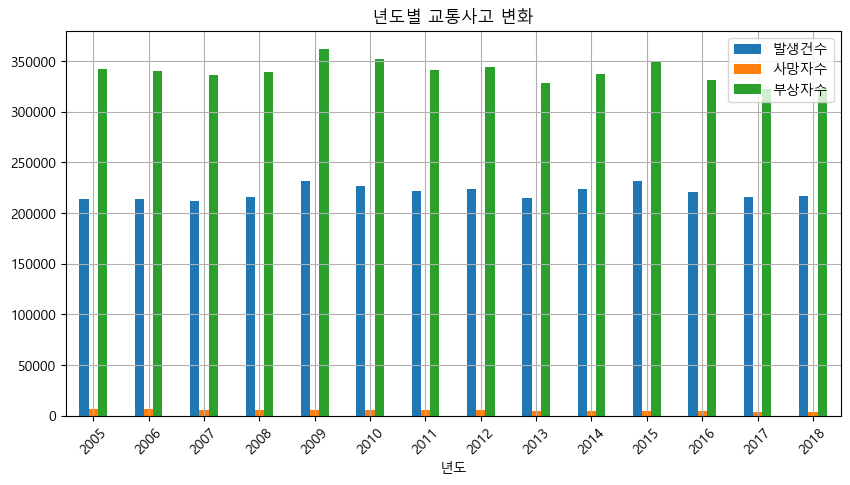

In [12]:
df.plot.bar(rot=45)
plt.grid()
plt.legend()
plt.title("년도별 교통사고 변화")
plt.show()
plt.close()

## #04. 산점도 그래프

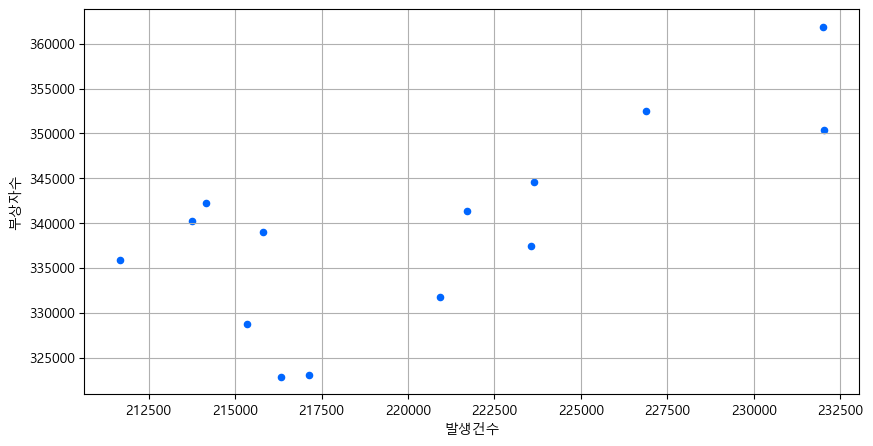

In [13]:
df.plot.scatter(x='발생건수', y='부상자수', color="#0066ff")
plt.grid()
plt.show()
plt.close()

## #05. 파이 그래프

dataframe의 index가 파이 그래프의 각 조각이 된다.

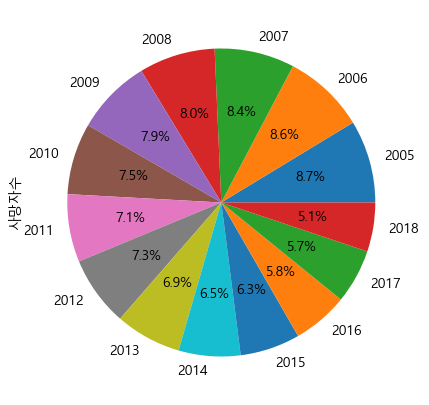

In [14]:
df['사망자수'].plot.pie(autopct='%0.1f%%')
plt.show()
plt.close()